In [1]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [2]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first three line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [5]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [6]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [7]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7738980350504514

In [8]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
_ = text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.8238183749336165

In [9]:
from sklearn.model_selection import GridSearchCV
>>> parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3)}

In [10]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [30]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'tfidf__use_idf': (True, False),
               'clf-svm__alpha': (1e-2, 1e-3),
}
gs_clf_svm = GridSearchCV(text_clf_svm, parameters_svm, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(twenty_train.data, twenty_train.target)
gs_clf_svm.best_score_
gs_clf_svm.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 4)}

In [31]:
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
a = [1e-5, 1e-4,1e-3,1e-2,1e-1,1]
a = np.linspace(1e-5,1e-1,10)
ngram = [(1, 1), (1, 2),(1,3),(1,4),(1,5)]
log = []
log2 = []
alph = 1e-3
for ng in ngram:
    #text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=alph, n_iter=5, random_state=42))])
    #_ = text_clf_svm.fit(twenty_train.data, twenty_train.target)
    #predicted_svm = text_clf_svm.predict(twenty_test.data)
    #log.append(np.mean(predicted_svm == twenty_test.target))
    text_clf_svm = Pipeline([('vect', CountVectorizer(ngram_range=ng)),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=alph, n_iter=5, random_state=42))])
    _ = text_clf_svm.fit(twenty_train.data, twenty_train.target)
    predicted_svm = text_clf_svm.predict(twenty_test.data)
    log2.append(np.mean(predicted_svm == twenty_test.target))

#plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochast

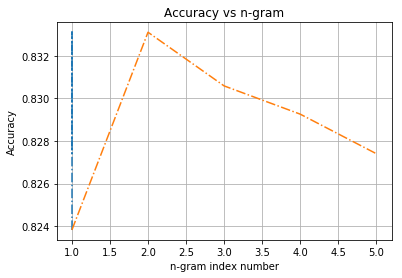

In [36]:
#fig = plt.plot(a,log,':',label = "NB Classifier")
plt.plot(ngram,log2,'-.',label = "SVM Classifier")
#plt.legend(loc = "upper right")
plt.title("Accuracy vs n-gram")
plt.xlabel("n-gram index number")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig('Accuracy-ngram.png')